In [5]:
import pandas as pd

netflix_top = pd.read_csv(r'./netflix_daily_top_10.csv')
df_netflix_top = pd.DataFrame(netflix_top)

#### TIPOS DE DADOS DISPONIVEIS

In [6]:
df_netflix_top.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


#### PERÍODO  DA ANÁLISE FEITA

In [25]:
max_date = pd.to_datetime(df_netflix_top['As of'].max())
min_date = pd.to_datetime(df_netflix_top['As of'].min())

periodo = (max_date - min_date).days

periodo

709

ANALÍSE FEITA EM UM PERÍODO DE 709 DIAS

#### TAMANHO DA BASE DE DADOS

In [26]:
df_netflix_top.shape

(7100, 10)

SHAPE DE 7100 LINHAS E 10 COLUNAS

#### VERIFICANDO DADOS NULOS


In [28]:
df_netflix_top.isna().sum()

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

In [31]:
df_netflix_top[df_netflix_top.isna().any(axis=1)]

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
8,2020-04-01,9,8,-,Badland,Movie,NaN,"Mar 26, 2020",4,11
12,2020-04-02,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",10,84
15,2020-04-02,6,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",6,35
...,...,...,...,...,...,...,...,...,...,...
7090,2022-03-11,1,2,-,The Last Kingdom,TV Show,NaN,"Jul 10, 2016",13,62
7092,2022-03-11,3,3,-,Good Girls,TV Show,NaN,"Jan 1, 2019",26,149
7097,2022-03-11,8,8,-,Shooter,Movie,NaN,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,NaN,"Mar 1, 2022",10,33


EXISTEM 2501 DADOS NULOS (MISSING VALUES)

#### VERIFICANDO OUTLIERS

<Axes: >

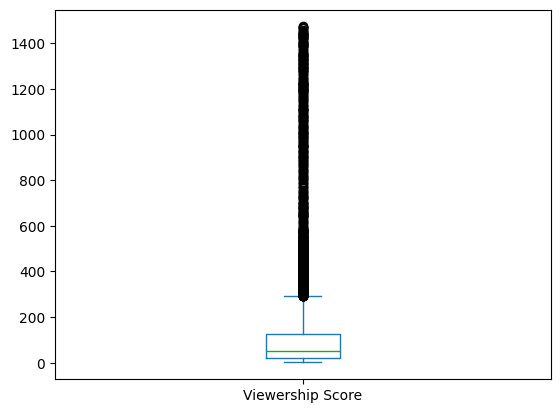

In [35]:
df_netflix_top['Viewership Score'].plot.box()

<Axes: ylabel='Frequency'>

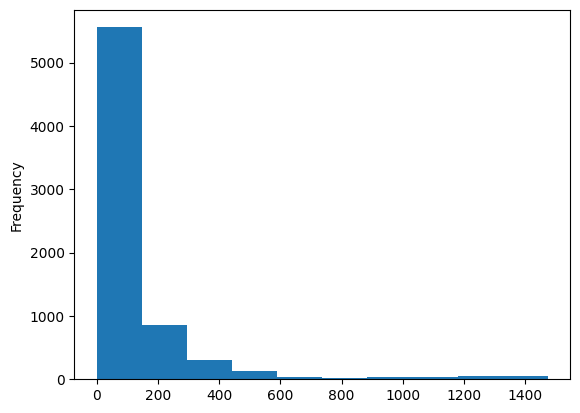

In [36]:
df_netflix_top['Viewership Score'].plot.hist()

In [37]:
# CALCULAR RANGE DO INTERQUANTIL
q1_viewship = df_netflix_top['Viewership Score'].quantile(0.25)
q3_viewship = df_netflix_top['Viewership Score'].quantile(0.75)

iqr_viewship = q3_viewship - q1_viewship
iqr_viewship

np.float64(109.0)

RANGE DOS QUARTIS SÃO DE 109 PONTOS

In [38]:
# LIMITES INFERIOR E SUPERIOR COM LIMITE DE RANGE 1.5
limite_inf_viewship = q1_viewship - (iqr_viewship * 1.5)
limite_sup_viewship = q3_viewship + (iqr_viewship * 1.5)
limite_inf_viewship, limite_sup_viewship

(np.float64(-144.5), np.float64(291.5))

In [43]:
# MOSTRAR QUANTOS OUTLIERS EXISTEM
df_netflix_top['Viewership Score'][(df_netflix_top['Viewership Score'] < limite_inf_viewship) | (df_netflix_top['Viewership Score'] > limite_sup_viewship)].count()

np.int64(698)

EXISTEM 698 OUTLIERS